In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


### detecting AI-generated images using a CNN model

In [ ]:
# Import libraries
!pip install tensorflow pillow matplotlib

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [ ]:
# Load dataset - if using Kaggle, download the datasets locally and unzip them, or use the Kaggle API
from datasets import load_dataset
import os

import kagglehub

# Download latest version
path_to_dataset = kagglehub.dataset_download("birdy654/cifake-real-and-ai-generated-synthetic-images")

print("Path to dataset files:", path_to_dataset)


# Print the path to confirm it's correct
print(f"Path to dataset: {path_to_dataset}")

# List the contents of the directory to see its structure
!ls -l {path_to_dataset}


100%|██████████| 105M/105M [00:01<00:00, 66.2MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3
Path to dataset: /root/.cache/kagglehub/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images/versions/3
total 8
drwxr-xr-x 4 root root 4096 Nov  3 19:31 test
drwxr-xr-x 4 root root 4096 Nov  3 19:31 train


In [ ]:
!pip install opencv-python
!pip install vit_keras
!pip install tensorflow_addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.0
    Uninstalling typeguard-4.4.0:
      Successfully uninstalled typeguard-4.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:


# Example code for loading images in two folders, "AI" and "Real"
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)


# Train generator
train_data = train_datagen.flow_from_directory(
    path_to_dataset,  # Set path to your dataset directory
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Validation generator
val_data = train_datagen.flow_from_directory(
    path_to_dataset,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


# Print class indices to see if the classes are correctly identified
print(f"Train data class indices: {train_data.class_indices}")
print(f"Validation data class indices: {val_data.class_indices}")

# Check the number of samples found in each generator
print(f"Number of training samples: {train_data.samples}")
print(f"Number of validation samples: {val_data.samples}")


Found 96000 images belonging to 2 classes.
Found 24000 images belonging to 2 classes.
Train data class indices: {'test': 0, 'train': 1}
Validation data class indices: {'test': 0, 'train': 1}
Number of training samples: 96000
Number of validation samples: 24000


In [ ]:
batch = next(iter(val_data))
print(f"Train batch shape: {batch[0].shape}")
print(f"Train labels shape: {batch[1].shape}")


Train batch shape: (32, 256, 256, 3)
Train labels shape: (32,)


In [ ]:

# --- In ipython-input-29-0cb93b15cd1e ---
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ... rest of your imports

In [ ]:
# Load pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for binary classification
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

# Define the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 90,697,601 (345.98 MB)

 Trainable params: 67,109,889 (256.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Instead of trying to slice val_data, iterate through it to get the desired batches
import itertools

# Skip the first 525 batches
for _ in itertools.islice(train_data, 525):
    pass

# Now, val_data is effectively at the 526th batch
train_dat = next(train_data)  # Get the next batch (which is the 526th)

print(f"Validation batch shape: {train_dat[0].shape}")
print(f"Validation labels shape: {train_dat[1].shape}")

Validation batch shape: (32, 256, 256, 3)
Validation labels shape: (32,)


In [ ]:
# Instead of trying to slice val_data, iterate through it to get the desired batches
import itertools

# Skip the first 525 batches
for _ in itertools.islice(val_data, 525):
    pass

# Now, val_data is effectively at the 526th batch
val_dat = next(val_data)  # Get the next batch (which is the 526th)

print(f"Validation batch shape: {val_dat[0].shape}")
print(f"Validation labels shape: {val_dat[1].shape}")

Validation batch shape: (32, 256, 256, 3)
Validation labels shape: (32,)


**Train the Model**

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 471s 150ms/step - accuracy: 0.7791 - loss: 1.9222 - val_accuracy: 0.8333 - val_loss: 0.4506
Epoch 2/3
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 443s 148ms/step - accuracy: 0.8339 - loss: 0.4535 - val_accuracy: 0.8333 - val_loss: 0.4520
Epoch 3/3
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 439s 146ms/step - accuracy: 0.8353 - loss: 0.4520 - val_accuracy: 0.8333 - val_loss: 0.4506


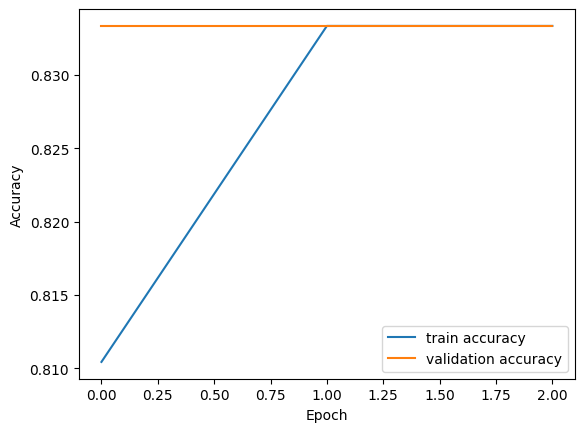

In [ ]:
# Train the model
history = model.fit(
    train_data,         # Pass the generator directly
    epochs=3,
    validation_data=val_data  # Pass the validation generator directly
)
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Model Evaluation

In [ ]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 108ms/step - accuracy: 0.8357 - loss: 0.4467
Validation Accuracy: 83.33%


Make Predictions on New Images

In [ ]:
# Function to preprocess and predict a single image
def predict_image(image_path):
    img = Image.open(image_path).resize((256, 256))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)

    if prediction[0] < 0.5:
        print("Prediction: Real Image")
    else:
        print("Prediction: AI-Generated Image")

# Test with a new image
predict_image('/content/drive/MyDrive/DSC_5607 copy.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Prediction: AI-Generated Image


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
